In [1]:
# Import the base libraries
import matplotlib.pyplot as plt #Plot Data
import numpy as np #To manage the data
from sklearn.datasets import load_iris #To load the database
from sklearn.model_selection import train_test_split #To split the database
from sklearn.metrics import accuracy_score #A measure to know the accuracy score of the model

In [2]:
data = load_iris() #Load the database

In [3]:
#Set the features and the labels
x = data.data
y = data.target

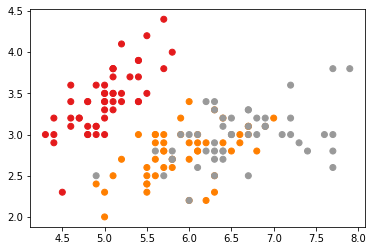

In [4]:
plt.scatter(x[:,0], x[:, 1], c=y, cmap=plt.cm.Set1) #Plot 2 axis of the data

In [5]:
train_data, test_data, train_target, test_target = train_test_split(x,y,test_size=0.2) # Split the data in training and testing (80%, 20%)

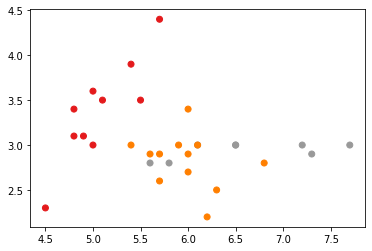

In [6]:
plt.scatter(test_data[:,0], test_data[:, 1], c=test_target, cmap=plt.cm.Set1) #Plot the same 2 axis of testing set (20% of the original data)

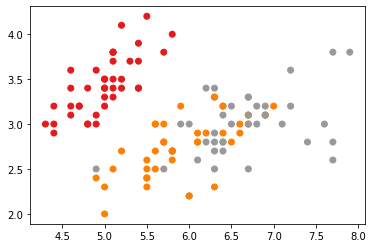

In [7]:
plt.scatter(train_data[:,0], train_data[:, 1], c=train_target, cmap=plt.cm.Set1) #Plot the same 2 axis of training set (80% of the original data)

In [8]:
#Create the a class for the model
class KnearestNeighbor():
    def __init__(self):
        pass

    def fit(self,x,y):
        self.x = x
        self.y = y
        k = int(len(x)**0.5)
        self.k = k if k%2 != 0 else k+1
        
    def predict(self,value):
        value = np.array(value)
        result = []
        for i in value:
            distance = [(sum((j-i)**2)**0.5,self.y[m]) for m,j in enumerate(self.x)]            
            distance = sorted(distance,key= lambda x: x[0])[:self.k]
            targets = [i[1] for i in distance]
            keys = sorted({i:targets.count(i) for i in targets}.items(),key=lambda x: x[1])[::-1]
            result.append(keys[0][0])
        return np.array(result)

In [9]:
model = KnearestNeighbor() #Create a KnearestNeighbor object called model
model.fit(train_data,train_target) #Fit the model with the training data
data_predict = model.predict(test_data) #Test the model with the test set and make predictions

In [10]:
accuracy_score(data_predict,test_target) #Show the acurracy of the model

0.9333333333333333